<p class="h1"; style="color:red; text-align:center; background-color:white"> Déployez un modèle dans le cloud </p>

Nous travaillons en tant que Data Scientist dans une jeune start-up de l'AgriTech, nommée  "**Fruits!**", qui cherche à proposer des solutions innovantes pour la récolte des fruits. Elle souhaite dans un premier temps se faire connaître en mettant à disposition du grand public une application mobile qui permettrait aux utilisateurs de prendre en photo un fruit et d'obtenir des informations sur ce fruit.

Pour Fruits, cette application permettrait de sensibiliser le grand public à la biodiversité des fruits et de mettre en place une première version du moteur de classification des images de fruits. De plus, le développement de l’application mobile permettra de construire une première version de l'architecture Big Data nécessaire.

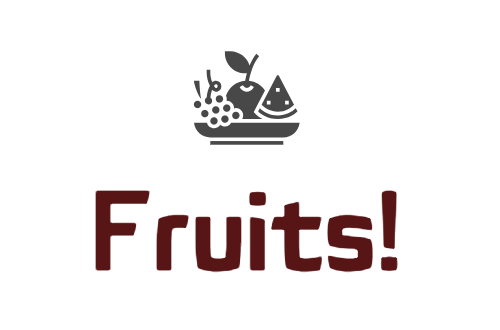


<p class="h2"; style="color:red; text-align:left; background-color:white"> Sommaire </p>

**1. Préambule**<br />
&emsp;1.1 Problématique<br />
&emsp;1.2 Objectifs dans ce projet<br />
&emsp;1.3 Déroulement des étapes du projet<br />
**2. Choix techniques généraux retenus**<br />
&emsp;2.1 Calcul distribué<br />
&emsp;2.2 Transfert Learning<br />
**3. Déploiement de la solution en local**<br />
&emsp;3.1 Environnement de travail<br />
&emsp;3.2 Installation de Spark<br />
&emsp;3.3 Installation des packages<br />
&emsp;3.4 Import des librairies<br />
&emsp;3.5 Définition des PATH pour charger les images et enregistrer les résultats<br />
&emsp;3.6 Création de la SparkSession<br />
&emsp;3.7 Traitement des données<br />
&emsp;&emsp;3.7.1 Chargement des données<br />
&emsp;&emsp;3.7.2 Préparation du modèle<br />
&emsp;&emsp;3.7.3 Définition du processus de chargement des images et application <br />
&emsp;&emsp;&emsp;&emsp;&emsp;de leur featurisation à travers l'utilisation de pandas UDF<br />
&emsp;&emsp;3.7.4 Exécution des actions d'extractions de features<br />
&emsp;3.8 Chargement des données enregistrées et validation du résultat<br />
**4. Déploiement de la solution sur le cloud**<br />
&emsp;4.1 Choix du prestataire cloud : AWS<br />
&emsp;4.2 Choix de la solution technique : EMR<br />
&emsp;4.3 Choix de la solution de stockage des données : Amazon S3<br />
&emsp;4.4 Configuration de l'environnement de travail<br />
&emsp;4.5 Upload de nos données sur S3<br />
&emsp;4.6 Configuration du serveur EMR<br />
&emsp;&emsp;4.6.1 Étape 1 : Logiciels et étapes<br />
&emsp;&emsp;&emsp;4.6.1.1 Configuration des logiciels<br />
&emsp;&emsp;&emsp;4.6.1.2 Modifier les paramètres du logiciel<br />
&emsp;&emsp;4.6.2 Étape 2 : Matériel<br />
&emsp;&emsp;4.6.3 Étape 3 : Paramètres de cluster généraux<br />
&emsp;&emsp;&emsp;4.6.3.1 Options générales<br />
&emsp;&emsp;&emsp;4.6.3.2 Actions d'amorçage<br />
&emsp;&emsp;4.6.4 Étape 4 : Sécurité<br />
&emsp;&emsp;&emsp;4.6.4.1 Options de sécurité<br />
&emsp;4.7 Instanciation du serveur<br />
&emsp;4.8 Création du tunnel SSH à l'instance EC2 (Maître)<br />
&emsp;&emsp;4.8.1 Création des autorisations sur les connexions entrantes<br />
&emsp;&emsp;4.8.2 Création du tunnel ssh vers le Driver<br />
&emsp;&emsp;4.8.3 Configuration de FoxyProxy<br />
&emsp;&emsp;4.8.4 Accès aux applications du serveur EMR via le tunnel ssh<br />
&emsp;4.9 Connexion au notebook JupyterHub<br />
&emsp;4.10 Exécution du code<br />
&emsp;&emsp;4.10.1 Démarrage de la session Spark<br />
&emsp;&emsp;4.10.2 Installation des packages<br />
&emsp;&emsp;4.10.3 Import des librairies<br />
&emsp;&emsp;4.10.4 Définition des PATH pour charger les images et enregistrer les résultats<br />
&emsp;&emsp;4.10.5 Traitement des données<br />
&emsp;&emsp;&emsp;4.10.5.1 Chargement des données<br />
&emsp;&emsp;&emsp;4.10.5.2 Préparation du modèle<br />
&emsp;&emsp;&emsp;4.10.5.3 Définition du processus de chargement des images<br />
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;et application de leur featurisation à travers l'utilisation de pandas UDF<br />
&emsp;&emsp;&emsp;4.10.5.4 Exécutions des actions d'extractions de features<br />
&emsp;&emsp;4.10.6 Chargement des données enregistrées et validation du résultat<br />
&emsp;4.11 Suivi de l'avancement des tâches avec le Serveur d'Historique Spark<br />
&emsp;4.12 Résiliation de l'instance EMR<br />
&emsp;4.13 Cloner le serveur EMR (si besoin)<br />
&emsp;4.14 Arborescence du serveur S3 à la fin du projet<br />
**5. Conclusion**

<p class="h2"; style="color:red; text-align:left; background-color:white"> 1. Préambule </p>


<p class="h3"; style="color:blue; text-align:left; background-color:white"> 1.1 Problématique </p>

La très jeune start-up de l'AgriTech, nommée "**Fruits**!", cherche à proposer des solutions innovantes pour la récolte des fruits.

La volonté de l’entreprise est de préserver la biodiversité des fruits en permettant des traitements spécifiques pour chaque espèce de fruits en développant des robots cueilleurs intelligents.

La start-up souhaite dans un premier temps se faire connaître en mettant à disposition du grand public une application mobile qui permettrait aux utilisateurs de prendre en photo un fruit et d'obtenir des informations sur ce fruit.

Pour la start-up, cette application permettrait de sensibiliser le grand public à la biodiversité des fruits et de mettre en place une première version du moteur de classification des images de fruits.

De plus, le développement de l’application mobile permettra de construire une première version de l'architecture **Big Data** nécessaire.


<p class="h3"; style="color:blue; text-align:left; background-color:white"> 1.2 Objectifs dans ce projet </p>

1. Développer une première chaîne de traitement des données qui comprendra le **preprocessing** et une étape de **réduction de dimension**.
2. Tenir compte du fait que <u>le volume de données va augmenter très rapidement</u> après la livraison de ce projet, ce qui implique de:
 - Déployer le traitement des données dans un environnement **Big Data**
 - Développer les scripts en **pyspark** pour effectuer du **calcul distribué**
 

<p class="h3"; style="color:blue; text-align:left; background-color:white"> 1.3 Déroulement des étapes du projet </p>

Le projet va être réalisé en 2 temps, dans deux environnements différents. Nous allons dans un premier temps développer et exécuter notre code en local, en travaillant sur un nombre limité d'images à traiter.

Une fois les choix techniques validés, nous déploierons notre solution dans un environnement Big Data en mode distribué.<u>Pour cette raison, ce projet sera divisé en 3 parties</u>:
1. Liste des choix techniques généraux retenus
2. Déploiement de la solution en local
3. Déploiement de la solution dans le cloud

<p class="h2"; style="color:red; text-align:left; background-color:white"> 2. Choix techniques généraux retenus</p>


<p class="h3"; style="color:blue; text-align:left; background-color:white"> 2.1 Calcul distribué </p>

L’énoncé du projet nous impose de développer des scripts en **pyspark** afin de <u>prendre en compte l’augmentation très rapide du volume de donné après la livraison du projet</u>. Pour comprendre rapidement et simplement ce qu’est **pyspark** et son principe de fonctionnement, nous vous conseillons de lire cet article : [PySpark : Tout savoir sur la librairie Python](https://datascientest.com/pyspark)

<u>Le début de l’article nous dit ceci </u>:
« *Lorsque l’on parle de traitement de bases de données sur python,
on pense immédiatement à la librairie pandas. Cependant, lorsqu’on a affaire à des bases de données trop massives, les calculs deviennent trop lents.Heureusement, il existe une autre librairie python, assez proche
de pandas, qui permet de traiter des très grandes quantités de données : PySpark.Apache Spark est un framework open-source développé par l’AMPLab de UC Berkeley permettant de traiter des bases de données massives 
en utilisant le calcul distribué, technique qui consiste à exploiter plusieurs unités de calcul réparties en clusters au profit d’un seul projet afin de diviser le temps d’exécution d’une requête.
Spark a été développé en Scala et est au meilleur de ses capacités dans son langage natif. Cependant, la librairie PySpark propose de l’utiliser avec le langage Python, en gardant des performances similaires à des implémentations en Scala.Pyspark est donc une bonne alternative à la librairie pandas lorsqu’on cherche à traiter des jeux de données trop volumineux qui entraînent des calculs trop chronophages.* »

Comme nous le constatons, **pySpark** est un moyen de communiquer avec **Spark** via le langage **Python**.**Spark**, quant à lui, est un outil qui permet de gérer et de coordonner l'exécution de tâches sur des données à travers un groupe d'ordinateurs.`Spark (ou Apache Spark) est un framework open source de calcul distribué in-memory pour le traitement et l'analyse de données massives`.

Un autre [article très intéressant et beaucoup plus complet pour comprendre le **fonctionnement de Spark**](https://www.veonum.com/apache-spark-pour-les-nuls/), ainsi que le rôle des **Spark Session** que nous utiliserons dans ce projet. <u>Voici également un extrait</u>:
*Les applications Spark se composent d’un pilote (« driver process »)et de plusieurs exécuteurs (« executor processes »). Il peut être configuré pour être lui-même l’exécuteur (local mode) ou en utiliser autant que nécessaire pour traiter l’application, Spark prenant en charge la mise à l’échelle automatique par une configuration d’un nombre 

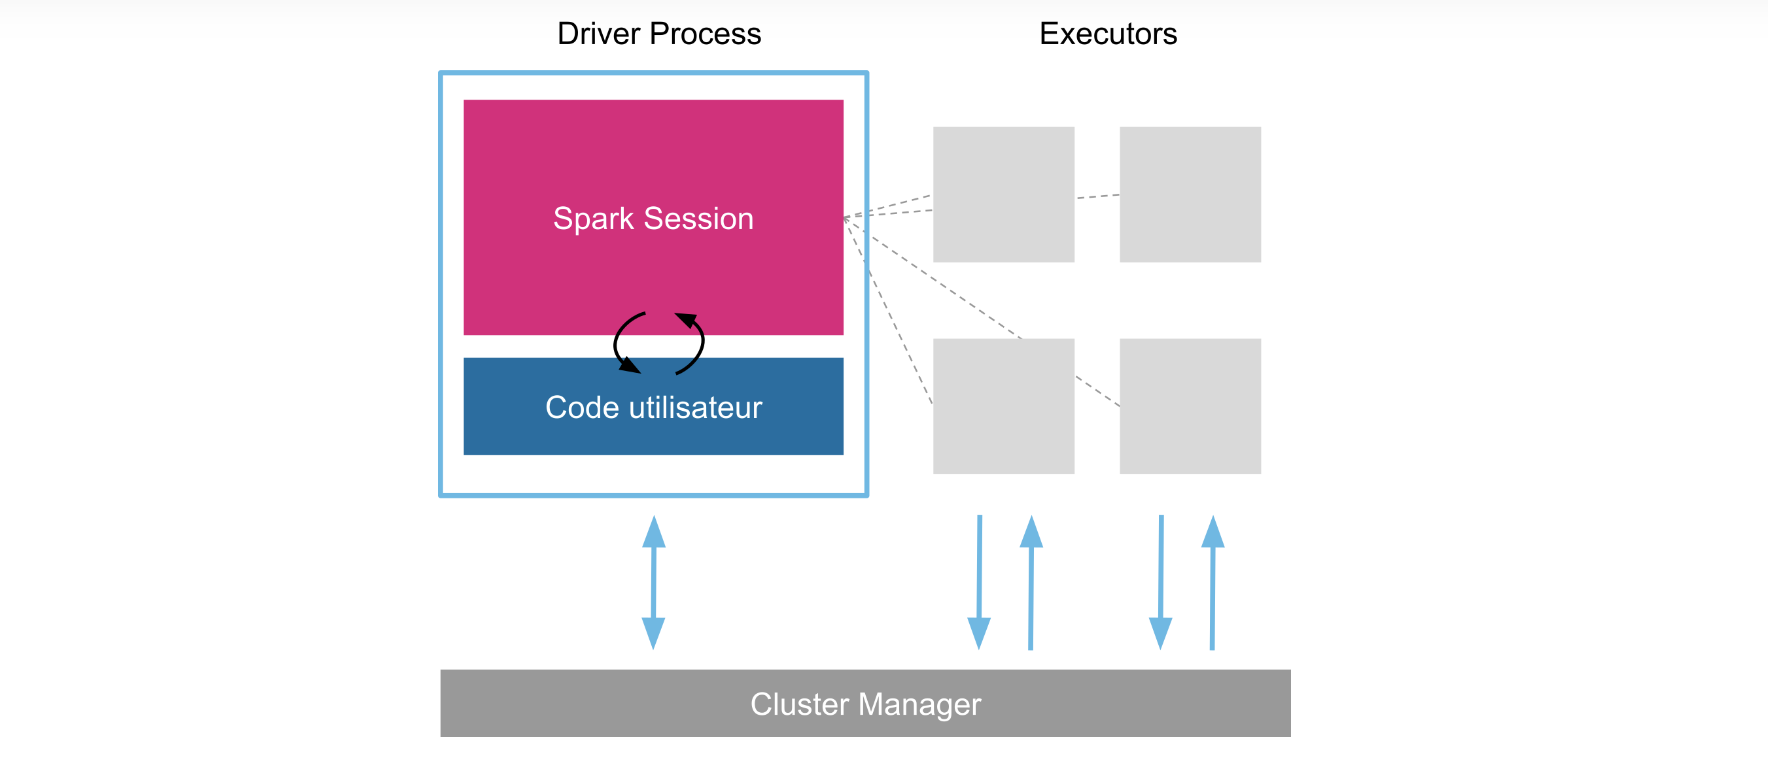

Le **driver** (parfois appelé « `Spark Session` ») distribue et planifie les tâches entre les différents exécuteurs qui les exécutent et permettent un traitement réparti. Il est le responsable de l’exécution du code sur les différentes machines.

Chaque **exécuteur** est un processus `Java Virtual Machine (JVM)` distinct dont il est possible de configurer le nombre de CPU et la quantité de mémoire qui lui est alloué. Une seule tâche peut traiter un fractionnement de données à la fois.

Dans les deux environnements (Local et Cloud) nous utiliserons donc **Spark** et nous l’exploiterons à travers des scripts python grâce à **PySpark**.

Dans la <u>version locale</u> de notre script nous **simulerons le calcul distribué** afin de valider que notre solution fonctionne. Dans la <u>version cloud</u> nous **réaliserons les opérations sur un cluster de machine**.

<p class="h3"; style="color:blue; text-align:left; background-color:white"> 2.2 Transfert Learning </p>

L'énoncé du projet nous demande également de réaliser une première chaîne de traitement des données qui comprendra le preprocessing et une étape de réduction de dimension. Il est également précisé qu'il n'est pas nécessaire d'entraîner un modèle pour le moment.

Nous décidons de partir sur une solution de **transfert learning**. Simplement, le **transfert learning** consiste 
à utiliser la connaissance déjà acquise par un modèle entraîné (ici **MobileNetV2**) pourl'adapter à notre problématique. Nous allons par la suite fournir au modèle nos images, et nous allons <u>récupérer l'avant dernière couche</u> du modèle. 

- En effet la dernière couche de modèle est une couche softmax qui permet la classification des images ce que nous ne souhaitons pas dans ce projet.

- L'avant dernière couche correspond à un **vecteur réduit** de dimension (1,1,1280).

Cela permettra de réaliser une première version du moteur pour la classification des images des fruits.

**MobileNetV2** a été retenu pour sa <u>rapidité d'exécution</u>,particulièrement adaptée pour le traitement d'un gros volume de données ainsi que la <u>faible dimensionnalité du vecteur de caractéristique en sortie</u> (1,1,1280)

<p class="h2"; style="color:red; text-align:left; background-color:white"> 3. Déploiement de la solution en local</p>

<p class="h3"; style="color:blue; text-align:left; background-color:white"> 3.1 Environnement de travail </p>

Pour des raisons de simplicité, nous développons dans un environnement <br />
Linux Unbuntu (exécuté depuis une machine Windows dans une machine virtuelle)
* Pour installer une machine virtuelle :  https://www.malekal.com/meilleurs-logiciels-de-machine-virtuelle-gratuits-ou-payants/


<p class="h3"; style="color:blue; text-align:left; background-color:white"> 3.2 Installation de Spark </p>

La première étape consiste à installer Spark : https://computingforgeeks.com/how-to-install-apache-spark-on-ubuntu-debian/


<p class="h3"; style="color:blue; text-align:left; background-color:white"> 3.3 Installation des packages </p>

<u>On installe ensuite à l'aide de la commande **pip** les packages qui nous seront nécessaires</u> :

In [ ]:
#!pip install Pandas pillow tensorflow pyarrow findspark

In [ ]:
#!pip install tensorflow

<p class="h3"; style="color:blue; text-align:left; background-color:white">  3.4 Import des librairies </p>

In [ ]:
#import findspark
#findspark.init('/Users/awf/notebook/spark-3.3.1-bin-hadoop3')

In [4]:
import pandas as pd
from PIL import Image
import numpy as np
import io
import os

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import Model


from pyspark.sql.functions import col, pandas_udf, PandasUDFType, element_at, split
from pyspark.sql import SparkSession

<p class="h3"; style="color:blue; text-align:left; background-color:white"> 3.5 Définition des PATH pour charger les images et enregistrer les résultats </p>

Dans cette version locale nous partons du principe que les données sont stockées dans le même répertoire que le notebook.
- Nous n'utilisons qu'un extrait de **`300 images`** à traiter dans cette première version en local.
- L'extrait des images à charger est stockée dans le dossier **Test**.
- Nous enregistrerons le résultat de notre traitement dans le dossier "**Results_Local**"

In [5]:
PATH = os.getcwd()

path_data = PATH+ '/Test'
path_results = PATH+'/Results'


print("Data Path    :", path_data)
print("Resutls Path :", path_results)

Data Path    : /Users/awf/notebook/P8_Awounfouet_Thomas_12.2022/Test
Resutls Path : /Users/awf/notebook/P8_Awounfouet_Thomas_12.2022/Results


Sample category - Apple Crimson Snow :


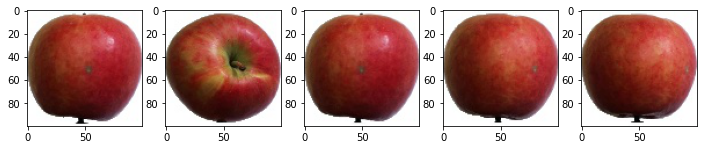

Sample category - Banana Red :


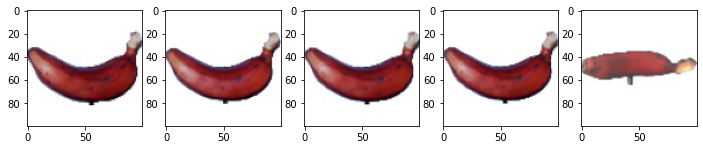

Sample category - Pear Forelle :


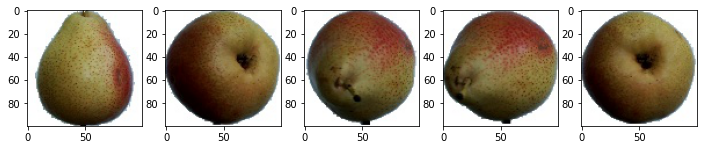

Sample category - Dates :


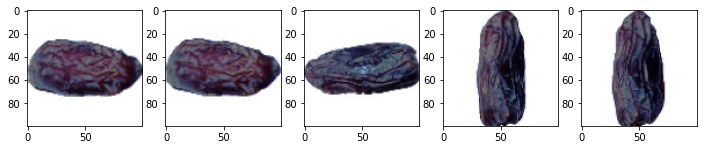

Sample category - Kohlrabi :


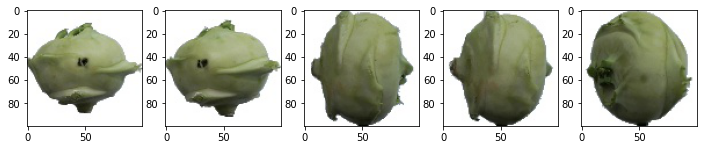

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

import random

list_categories = os.listdir(path_data)
random_categories = random.sample(list_categories, k=5)

for i in range(len(random_categories)):
    print('Sample category - {} :'.format(random_categories[i]))
    category_i_path = path_data+ "/" + random_categories[i]
    
    image_sample = random.sample(os.listdir(category_i_path), k=5)
    
    plt.figure(figsize=(12,4))
    for i in range(5):
        plt.subplot(150 + 1 + i)
        filename = category_i_path + "/"+ image_sample[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [5]:
filename

'/Users/awf/notebook/P8_Awounfouet_Thomas_12.2022/Test/Hazelnut/r_5_100.jpg'

<p class="h3"; style="color:blue; text-align:left; background-color:white"> 3.6 Création de la SparkSession </p>

L’application Spark est contrôlée grâce à un processus de pilotage (driver process) appelé **SparkSession**. <br />
<u>Une instance de **SparkSession** est la façon dont Spark exécute les fonctions définies par l’utilisateur dans l’ensemble du cluster</u>. <u>Une SparkSession correspond toujours à une application Spark</u>. `Ici nous créons une session spark en spécifiant dans l'ordre` :
 1. Un **nom pour l'application**, qui sera affichée dans l'interface utilisateur Web Spark "**P8**"
 2. L'application doit s'exécuter **localement**. 
> Nous ne définissons pas le nombre de cœurs à utiliser (comme .master('local[4]) pour 4 cœurs à utiliser), nous utiliserons donc tous les cœurs disponibles dans notre processeur.
 3. une option de configuration supplémentaire permettant d'utiliser le **format "parquet"** que nous utiliserons pour enregistrer et charger le résultat de notre travail.
 4. vouloir **obtenir une session spark** existante ou si aucune n'existe, en créer une nouvelle

In [9]:
spark = (SparkSession
             .builder
             .appName('P8-fruits')
             .master('local')
             .config("spark.sql.parquet.writeLegacyFormat", 'true')
             .getOrCreate()
        )

In [10]:
spark

In [11]:
# Frist import SparkContext object for pyspark
from pyspark import SparkContext

# Create an instance of the object 
"""
A SparkContext represents the connection to a Spark cluster, and can 
be used to create RDDs, accumulators and broadcast variables on that 
cluster.
    - Since we are using the app locally we have to specify local
    - Then give our app a name
"""
#sc = SparkContext("local", "P8-fruits")
#sc.stop()
sc = spark.sparkContext

In [ ]:
#Nous créons également la variable sc qui est un sparkContext issue de la variable spark*

#sc.setLogLevel("OFF")

#Affichage des informations de Spark en cours d'execution
#spark

<p class="h3"; style="color:blue; text-align:left; background-color:white"> 3.7 Traitement des données </p>

Dans la suite de notre flux de travail, nous allons successivement:
1. Préparer nos données
    1. Importer les images dans un dataframe **pandas UDF**
    2. Associer aux images leur **label**
    3. Préprocesser en **redimensionnant nos images pour qu'elles soient compatibles avec notre modèle**
2. Préparer notre modèle
    1. Importer le modèle **MobileNetV2**
    2. Créer un **nouveau modèle** dépourvu de la dernière couche de MobileNetV2
3. Définir le processus de chargement des images et l'application de leur featurisation à travers l'utilisation de pandas UDF
3. Exécuter les actions d'extraction de features
4. Enregistrer le résultat de nos actions
5. Tester le bon fonctionnement en chargeant les données enregistrées

<p class="h4"; style="color:red; text-align:left; background-color:white"> 3.7.1 Chargement des données </p>


Les images sont chargées au format binaire, ce qui offre, plus de souplesse dans la façon de prétraiter les images. Avant de charger les images :  
- Nous spécifions que nous voulons charger uniquement les fichiers dont l'extension est **jpg**. 
- Nous indiquons également de charger tous les objets possibles contenus  dans les **sous-dossiers** du dossier communiqué.

#### Méthode 1 

In [12]:
path_data

'/Users/awf/notebook/P8_Awounfouet_Thomas_12.2022/Test'

In [13]:
images_rdd = spark.read.format("binaryFile").option("pathGlobFilter", "*.jpg") \
                                        .option("recursiveFileLookup", "true") \
                                        .load(path_data)

In [ ]:
images_rdd.count()

In [ ]:
#one_percent_data = images_rdd.sample(False, 0.01).collect()

In [ ]:
images_rdd.show(5)

Affichage des `5 premières images contenant` :
 - le path de l'image
 - la date et heure de sa dernière modification
 - sa longueur
 - son contenu encodé en valeur hexadécimal
 
Je ne conserve que le **path** de l'image et j'ajoute une colonne contenant les **labels** de chaque image</u> :

In [ ]:
images_df = images_rdd.withColumn('label', element_at(split(images_rdd['path'], '/'),-2))

print(images_df.printSchema())

In [ ]:
print(images_df.select('path','label').show(5,False))

In [ ]:
images_df.select('path').head(5)

In [ ]:
#images_df.select('path').head(1)[0][0].split(':')[1]

In [ ]:
from pyspark.ml.image import ImageSchema

from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
plt.imshow(ImageArray_first);

# Affichage d'une image
first_image = images_df.select('path').head(1)[0][0].split(':')[1]

ImageArray_first = imread(first_image)
#print("Shape Image : ", ImageArray_first.shape)
plt.figure(figsize=(4,4))
plt.imshow(ImageArray_first);

In [ ]:
#ImageArray_first

#### Méthode 2

In [12]:
path_data

'/Users/awf/notebook/P8_Awounfouet_Thomas_12.2022/Test'

In [15]:
for dp, dn, filenames in os.walk(path_data):
    print(dp, "\n")
    print(dn[0], "\n")
    print(filenames, "\n")
    break

/Users/awf/notebook/P8_Awounfouet_Thomas_12.2022/Test 

Tomato 4 

['.DS_Store'] 



In [16]:
import os
#local_dir = "/dbfs/databricks-datasets/flower_photos"
local_dir = path_data

files = [os.path.join(data_path, f) for data_path, data_classes, filenames in os.walk(local_dir) 
                             for f in filenames if os.path.splitext(f)[1] == '.jpg']
#files = files[:2048]
len(files)

22688

Notre jeu de données de **Test** contient **22819 images**.Cependant, dans l'exécution en mode **local**, nous <u>traiterons un ensemble réduit de **10 images**</u>.

In [67]:
#files

In [17]:
sample_images = random.sample(files, k=10)
#sample_300_images

In [26]:
image_data = []
image_label = []
sample_path = []

for file in sample_images:
    img = Image.open(file)
    img = img.resize([224, 224])
    data = np.asarray( img, dtype="float32" ).reshape([224*224*3])
    label = file.split("/")[-2] 
    
    image_data.append({"data": data})
    image_label.append(label)
    sample_path.append(file)

In [27]:
len(image_data), len(image_label), len(sample_path)

(10, 10, 10)

In [28]:
label, file, data

('Pear Red',
 '/Users/awf/notebook/P8_Awounfouet_Thomas_12.2022/Test/Pear Red/202_100.jpg',
 array([255., 255., 255., ..., 255., 255., 255.], dtype=float32))

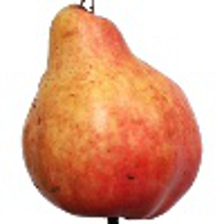

In [29]:
img

In [30]:
pandas_df = pd.DataFrame(image_data, columns = ['data'])

pandas_df["label"] = image_label
pandas_df['path'] = sample_path

pandas_df

,data,label,path
0,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Cantaloupe 1,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
1,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Potato White,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
2,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Strawberry,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
3,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Pear Red,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
4,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Banana,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
5,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Carambula,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
6,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Pear Red,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
7,"[255.0, 253.0, 250.0, 255.0, 253.0, 250.0, 255...",Apple Red 3,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
8,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Salak,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...
9,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Pear Red,/Users/awf/notebook/P8_Awounfouet_Thomas_12.20...


In [13]:
file_name = "sample_10_image_data.parquet"
#pandas_df.to_parquet(file_name)

In [ ]:
#os.makedirs(dbfs_file_path)
#shutil.copyfile(file_name, dbfs_file_path+file_name)

In [ ]:
#dbfs_file_path = "/dbfs/{}/".format(temp_path)

### Load Data into Spark DataFrames

In [14]:
file_name = "sample_10_image_data.parquet"

from pyspark.sql.types import *
df = spark.read.parquet(file_name)

In [19]:
print(df.count())

10


In [68]:
# Decrease the batch size of the Arrorw reader to avoid OOM errors on smaller instance types.
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "1024")

In [20]:
# This line will fail if the vectorized reader runs out of memory
assert len(df.head()) > 0, "`df` should not be empty" 

In [21]:
df.printSchema()

root
 |-- data: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- label: string (nullable = true)
 |-- path: string (nullable = true)



In [15]:
df.show()

+--------------------+-----------------+--------------------+
|                data|            label|                path|
+--------------------+-----------------+--------------------+
|[255.0, 255.0, 25...|      Apple Red 3|/Users/awf/notebo...|
|[255.0, 255.0, 25...|      Pomegranate|/Users/awf/notebo...|
|[255.0, 255.0, 25...|         Rambutan|/Users/awf/notebo...|
|[255.0, 255.0, 25...|        Blueberry|/Users/awf/notebo...|
|[255.0, 255.0, 25...|         Cherry 2|/Users/awf/notebo...|
|[255.0, 255.0, 25...|     Potato White|/Users/awf/notebo...|
|[255.0, 255.0, 25...|     Pear Monster|/Users/awf/notebo...|
|[255.0, 255.0, 25...|Potato Red Washed|/Users/awf/notebo...|
|[255.0, 255.0, 25...|         Tomato 4|/Users/awf/notebo...|
|[247.0, 255.0, 25...|         Pear Red|/Users/awf/notebo...|
+--------------------+-----------------+--------------------+



#### Define the function to parse the input data.

In [26]:
def parse_image(image_data):
    image = tf.image.convert_image_dtype(image_data, dtype=tf.float32) * (2. / 255) - 1
    image = tf.reshape(image,[224,224,3])
    return image

<p class="h4"; style="color:red; text-align:left; background-color:white"> 3.7.2 Préparation du modèle </p>

Je vais utiliser la technique du **transfert learning** pour extraire les features des images. J'ai choisi d'utiliser le modèle **MobileNetV2** pour sa rapidité d'exécution comparée à d'autres modèles comme *VGG16* par exemple.

In [32]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=True)

In [40]:
#model.summary()

In [33]:
new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)

In [29]:
new_model

#### EXTRACTION DES FEATURES


Nous utilisons ici une approche de featurization de nos images par transfer learning.

Cela consiste à extraire les features les plus pertinentes pour la classification de nos iamges en utilisant un modèle de deep learning pré-entraîné sur de la classification d'image, auquel on enlève la dernière couche - celle qui classifie - afin d'obtenir en sortie un tenseur des features les plus significatives de nos images.

Ce tenseur pourra ensuite être fourni à un autre modèle de classification, qui sera ainsi adapté à nos classes.

Nous utilisons ici un modèle VGG16 pré-entraîné pour de la classification d'images, auquel nous retirons la dernière couche.

In [34]:
brodcast_weights = sc.broadcast(new_model.get_weights())

In [35]:
bc_model_weights = sc.broadcast(model.get_weights())

In [36]:
bc_model_weights.value[0][0][0][0]

array([ 0.02825263, -0.01187372,  0.00151489,  0.0174512 ,  0.02267267,
       -0.07706022,  0.02593261,  0.00758947,  0.01483854,  0.00269824,
       -0.02794643,  0.01281348, -0.00239688, -0.02064885, -0.00565647,
       -0.01334927, -0.07256436, -0.04735989,  0.02042213,  0.06503097,
       -0.00141359,  0.0067685 , -0.00452705,  0.00789207,  0.0037927 ,
       -0.02793706, -0.02059007, -0.01074472, -0.03362909, -0.00028938,
       -0.01099383,  0.00777401, -0.02380833,  0.00196355,  0.04691625,
        0.00554846,  0.01841898, -0.01014032, -0.01754054,  0.09017435,
        0.02368956, -0.02602403,  0.01441176, -0.01233377, -0.01345379,
       -0.00706803, -0.02015607, -0.012672  , -0.0035574 ,  0.00865486,
        0.07378456,  0.0110056 ,  0.03461925,  0.01144895,  0.001062  ,
        0.00103144,  0.00486954,  0.02316773,  0.0355238 , -0.00459298,
       -0.00914957, -0.0107004 , -0.05279828, -0.00136667], dtype=float32)

<p class="h4"; style="color:red; text-align:left; background-color:white"> 3.7.3 Définition du processus de chargement des images et application de leur featurisation <br/>à travers l'utilisation de pandas UDF </p>

Ce notebook définit la logique par étapes, jusqu'à Pandas UDF. `L'empilement des appels est la suivante` :

- Pandas UDF
  - featuriser une série d'images pd.Series
   - prétraiter une image

In [37]:
@pandas_udf(ArrayType(FloatType()), PandasUDFType.SCALAR_ITER)
def featurize_batch_udf(image_batch_iter):
    batch_size = 64
    
    model = ResNet50(weights=None)
    model.set_weights(bc_model_weights.value)
    
    for image_batch in image_batch_iter:
        images = np.vstack(image_batch)
        
        dataset = tf.data.Dataset.from_tensor_slices(images)
        dataset = dataset.map(parse_image, 
                              num_parallel_calls=8).prefetch(5000).batch(batch_size)
        
        preds = model.predict(dataset)
        
        #output = [p.flatten() for p in preds]
        
        yield pd.Series(list(preds))

<p class="h4"; style="color:red; text-align:left; background-color:white"> 3.7.4 Exécution des actions d'extraction de features </p>

Les Pandas UDF, sur de grands enregistrements (par exemple, de très grandes images),peuvent rencontrer des erreurs de type Out Of Memory (OOM). Si vous rencontrez de telles erreurs dans la cellule ci-dessous, essayez de réduire la taille du lot Arrow via 'maxRecordsPerBatch' Nous n'utiliserons pas cette commande dans ce projet et nous laissons donc la commande en commentaire.

Nous pouvons maintenant exécuter la featurisation sur l'ensemble de notre DataFrame Spark. 

**REMARQUE**: Cela peut prendre beaucoup de temps, tout dépend du volume de données à traiter. <br />

In [38]:
features_df = df.select(col("path"),
                           col('label'),
                           col("data"),
                           featurize_batch_udf(col("data")).alias("image_features"))

In [39]:
features_df.count()

10

In [40]:
features_df.show()

2023-01-31 18:38:56.572644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 18:39:01.605040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Cause: Unable to locate the source code of <function parse_image at 0x7faffda6fb80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compati

+--------------------+-----------------+--------------------+--------------------+
|                path|            label|                data|      image_features|
+--------------------+-----------------+--------------------+--------------------+
|/Users/awf/notebo...|      Apple Red 3|[255.0, 255.0, 25...|[1.3847473E-4, 4....|
|/Users/awf/notebo...|      Pomegranate|[255.0, 255.0, 25...|[1.7930818E-4, 3....|
|/Users/awf/notebo...|         Rambutan|[255.0, 255.0, 25...|[1.6224543E-4, 3....|
|/Users/awf/notebo...|        Blueberry|[255.0, 255.0, 25...|[1.6316577E-4, 3....|
|/Users/awf/notebo...|         Cherry 2|[255.0, 255.0, 25...|[1.8402364E-4, 3....|
|/Users/awf/notebo...|     Potato White|[255.0, 255.0, 25...|[2.140718E-4, 3.6...|
|/Users/awf/notebo...|     Pear Monster|[255.0, 255.0, 25...|[1.8808225E-4, 2....|
|/Users/awf/notebo...|Potato Red Washed|[255.0, 255.0, 25...|[1.6234977E-4, 3....|
|/Users/awf/notebo...|         Tomato 4|[255.0, 255.0, 25...|[2.3085532E-4, 4....|
|/Us

In [41]:
#features_df.write.mode("overwrite").parquet(path_results)

In [42]:
result_df = spark.read.parquet(path_results, engine='pyarrow')
display(result_df)

DataFrame[path: string, label: string, data: array<float>, image_features: array<float>]

In [43]:
result_df.printSchema()

root
 |-- path: string (nullable = true)
 |-- label: string (nullable = true)
 |-- data: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- image_features: array (nullable = true)
 |    |-- element: float (containsNull = true)



In [44]:
result_df.show(5)

+--------------------+-----------+--------------------+--------------------+
|                path|      label|                data|      image_features|
+--------------------+-----------+--------------------+--------------------+
|/Users/awf/notebo...|Apple Red 3|[255.0, 255.0, 25...|[1.3847473E-4, 4....|
|/Users/awf/notebo...|Pomegranate|[255.0, 255.0, 25...|[1.7930818E-4, 3....|
|/Users/awf/notebo...|   Rambutan|[255.0, 255.0, 25...|[1.6224543E-4, 3....|
|/Users/awf/notebo...|  Blueberry|[255.0, 255.0, 25...|[1.6316577E-4, 3....|
|/Users/awf/notebo...|   Cherry 2|[255.0, 255.0, 25...|[1.8402364E-4, 3....|
+--------------------+-----------+--------------------+--------------------+
only showing top 5 rows



In [45]:
image_data_features = result_df.select('image_features')
image_data_features.show()

+--------------------+
|      image_features|
+--------------------+
|[1.3847473E-4, 4....|
|[1.7930818E-4, 3....|
|[1.6224543E-4, 3....|
|[1.6316577E-4, 3....|
|[1.8402364E-4, 3....|
|[2.140718E-4, 3.6...|
|[1.8808225E-4, 2....|
|[1.6234977E-4, 3....|
|[2.3085532E-4, 4....|
|[2.0627737E-4, 3....|
+--------------------+



In [46]:
image_data_features.count()

10

<p class="h4"; style="color:red; text-align:left; background-color:white"> 3.7.5 Reduction de Dimension </p>

In [47]:
from pyspark.sql.functions import udf
# transform
from pyspark.ml.linalg import Vectors, VectorUDT

# Vectorizzation
# De Array à Vectors pour appliquer la PCA
#Les données images sont converties au format vecteur dense
array_to_vector_udf = udf(lambda r: Vectors.dense(r), VectorUDT())
df_features_vector = image_data_features.withColumn('image_features_vectors',
                                     array_to_vector_udf('image_features'))

In [48]:
df_features_vector.show()

+--------------------+----------------------+
|      image_features|image_features_vectors|
+--------------------+----------------------+
|[1.3847473E-4, 4....|  [1.38474730192683...|
|[1.7930818E-4, 3....|  [1.79308175574988...|
|[1.6224543E-4, 3....|  [1.62245429237373...|
|[1.6316577E-4, 3....|  [1.63165765115991...|
|[1.8402364E-4, 3....|  [1.84023636393249...|
|[2.140718E-4, 3.6...|  [2.14071798836812...|
|[1.8808225E-4, 2....|  [1.88082252861931...|
|[1.6234977E-4, 3....|  [1.62349766469560...|
|[2.3085532E-4, 4....|  [2.30855323025025...|
|[2.0627737E-4, 3....|  [2.06277371034957...|
+--------------------+----------------------+



In [49]:

from pyspark.ml.linalg import Vectors, VectorUDT, DenseVector
from pyspark.ml.feature import StandardScaler

# Standardisation : Mise à l'échelle à l'aide de la moyenne égal à 0 et l'écart-type à 1
standardizer = StandardScaler(inputCol="image_features_vectors", 
                              outputCol="image_features_scaled")

mod = standardizer.fit(df_features_vector)

df_features_scaled = mod.transform(df_features_vector)

In [50]:
nb_composante = len(image_data_features.select('image_features').take(1)[0][0])
nb_composante

1000

In [75]:
#len(image_data_features.select('image_features').take(1)[0][0])

In [51]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA

# PCA.
pca = PCA(k=nb_composante, 
          inputCol="image_features_scaled", 
          outputCol="pca_image_features")

model_pca = pca.fit(df_features_scaled.select('image_features_scaled')) 

23/01/31 18:39:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/01/31 18:39:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/01/31 18:39:55 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


23/01/31 18:39:55 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
23/01/31 18:39:55 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [83]:
#model_pca.explainedVariance

In [52]:
c = 0
for i in model_pca.explainedVariance.cumsum():
    c += 1
    if(i > 0.99):
        print(
            'Il faut {} composantes pour expliquer 99% de la variance du dataset'.format(c))
        break

Il faut 8 composantes pour expliquer 99% de la variance du dataset


In [53]:
# Réduction de dimention
pca = PCA(k=c, inputCol='image_features_scaled', outputCol='image_features_reduit')
model_pca = pca.fit(df_features_scaled)
spark_df_features_final = model_pca.transform(df_features_scaled)
#spark_df_features_final = spark_df_features_final.drop("image_features_scaled")

In [54]:
spark_df_features_final.show()

+--------------------+----------------------+---------------------+---------------------+
|      image_features|image_features_vectors|image_features_scaled|image_features_reduit|
+--------------------+----------------------+---------------------+---------------------+
|[1.3847473E-4, 4....|  [1.38474730192683...| [4.94031931875723...| [-135.06183786089...|
|[1.7930818E-4, 3....|  [1.79308175574988...| [6.39712128394550...| [-148.67096812452...|
|[1.6224543E-4, 3....|  [1.62245429237373...| [5.78837905895269...| [-150.62836629382...|
|[1.6316577E-4, 3....|  [1.63165765115991...| [5.82121359211665...| [-126.50089970038...|
|[1.8402364E-4, 3....|  [1.84023636393249...| [6.56535329382110...| [-134.42094968314...|
|[2.140718E-4, 3.6...|  [2.14071798836812...| [7.63737211780820...| [-182.68513269579...|
|[1.8808225E-4, 2....|  [1.88082252861931...| [6.71015127479395...| [-150.96672841044...|
|[1.6234977E-4, 3....|  [1.62349766469560...| [5.79210146551108...| [-151.67353838629...|
|[2.308553

<p class="h3"; style="color:blue; text-align:left; background-color:white"> Sauvegarde </p>

La fonction cast permet de transformer la colonne feature de array float à string pour pouvoir être pris en compte car array n'est pas accepté pour la sauvegarde en csv
#coalesce : définit le nombre de fichier csv différents à créer. coalesce(1) signifie créer un seul csv contenant toutes les images (1 gros fichier)

In [72]:
spark_df_features_final.write.mode('overwrite').parquet('./Results/final_results')

In [ ]:
spark_df_features_final.withColumn("image_features_reduit", col("image_features_reduit").\
                                   cast("string")).coalesce(1).write.option("header","true").\
                                   mode("Overwrite").csv(path='./Results/spark_df_features_final') 

In [62]:
#Write DataFrame data to CSV file
# Enregistrement des données (format parquet)

#start = time.perf_counter()
spark_df_features_final.write.mode('overwrite').parquet('./Results/spark_df_features_final')


<p class="h3"; style="color:blue; text-align:left; background-color:white"> 3.8 Chargement des données enregistrées et validation du résultat </p>

In [63]:
path_results = './Results/spark_df_features_final'

In [64]:
#On charge les données fraichement enregistrées dans un DataFrame Pandas:
df = pd.read_parquet(path_results, engine='pyarrow')

In [73]:
pd_final_df = pd.read_parquet('./Results/final_results', engine='pyarrow')

In [77]:
pd.read_csv('results.csv')

,origin,label,features
0,apple_golden_1/0_100.jpg,apple_golden_1,[-8.6784935 0.75648123 0.35807782 -0.314470...
1,apple_golden_1/10_100.jpg,apple_golden_1,[-8.6843157e+00 7.6826257e-01 2.8260523e-01 ...
2,apple_golden_1/11_100.jpg,apple_golden_1,[-8.6786671e+00 8.0171323e-01 3.0040875e-01 ...
3,apple_golden_1/12_100.jpg,apple_golden_1,[-8.657397 0.80580133 0.31877047 -0.349905...
4,apple_golden_1/13_100.jpg,apple_golden_1,[-8.631583 0.7904801 0.33387312 -0.316048...
...,...,...,...
1923,kiwi/r_317_100.jpg,kiwi,[-7.9200397 1.6106163 0.5193184 -0.575813...
1924,kiwi/r_318_100.jpg,kiwi,[-7.9690847 1.5926075 0.55425 -0.584890...
1925,kiwi/r_319_100.jpg,kiwi,[-7.9036164 1.5222826 0.52150935 -0.553000...
1926,kiwi/r_31_100.jpg,kiwi,[-8.61367798e+00 1.64728236e+00 8.09218585e-...


Nous venons de valider le processus sur un jeu de données allégé en local où nous avons simulé un cluster de machines en répartissant la charge de travail sur différents cœurs de processeur au sein d'une même machine.

Nous allons maintenant généraliser le processus en déployant notre solution sur un réel cluster de machines et nous travaillerons désormais sur la totalité des 22819 images de notre dossier **sample_300_images**.

<p class="h2"; style="color:red; text-align:left; background-color:white"> 4. Déploiement de la solution sur le cloud</p>

Maintenant que nous avons vérifié que notre solution fonctionne, il est temps de la <u>déployer à plus grande échelle sur un vrai cluster de machines</u>.

**Attention**, *Nous travaillons sous Linux avec une version Ubuntu, les commandes décrites ci-dessous sont donc réalisées exclusivement dans cet environnement.*

<u>Plusieurs contraintes se posent</u> :
 1. Quel prestataire de Cloud choisir ?
 2. Quelles solutions de ce prestataire adopter ?
 3. Où stocker nos données ?
 4. Comment configurer nos outils dans ce nouvel environnement ?

Retenons simplement ici qu'Hadoop et Spark permettent tous deux d'écrire des applications d'analyse de données qui peuvent être exécutées en parallèle sur des dizaines ou des milliers de serveurs. La tolérance aux pannes est gérée sans que le développeur ait à s'en préoccuper, ce qui correspond à notre besoin de maintenabilité énoncé dans le chapitre précédent.